In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
import yfinance as yf
import seaborn as sns

In [3]:
df = yf.Ticker("YESBANK.NS")

In [4]:
hist = df.history(period="max")

In [5]:
hist

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2005-07-12,8.458987,8.985266,7.701657,7.810764,244941515,0.0,0.0
2005-07-13,7.830016,8.086739,7.374335,7.534786,64111620,0.0,0.0
2005-07-14,7.701658,7.701658,7.316574,7.348665,16282865,0.0,0.0
2005-07-15,7.220304,8.272864,7.220304,7.939126,75448030,0.0,0.0
2005-07-18,8.048232,8.433315,8.022559,8.227937,75684775,0.0,0.0
...,...,...,...,...,...,...,...
2021-01-19,17.850000,18.000000,17.600000,17.900000,128056245,0.0,0.0
2021-01-20,17.950001,18.000000,17.400000,17.650000,196996362,0.0,0.0
2021-01-21,17.700001,17.799999,17.150000,17.250000,229436846,0.0,0.0


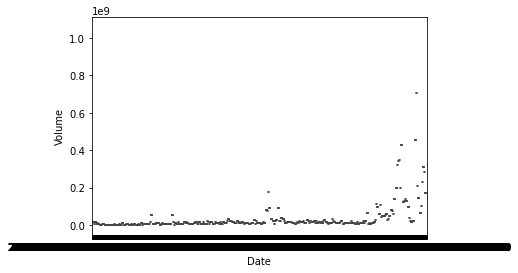

In [6]:
sns.boxplot(hist.index, hist.Volume)

In [7]:
hist['month'] = hist.index.month
hist['year'] = hist.index.year

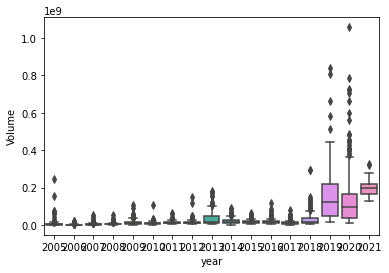

In [8]:
sns.boxplot(hist.year, hist.Volume)

In [9]:
hist_2019 = hist[hist.year == 2019]
hist_2020 = hist[hist.year == 2020]

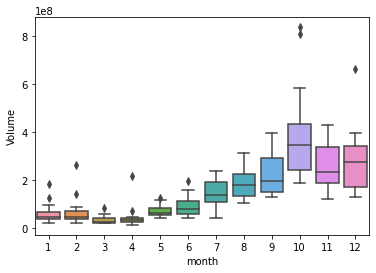

In [10]:
sns.boxplot(hist_2019.month, hist_2019.Volume)

In [11]:
data = hist_2019.Volume
mean = np.mean(data) 
# calculate standard deviation
sd = np.std(data)
# create empty list to store outliers
outliers = []
# detect outlier
for i in data: 
    z = (i-mean)/sd # calculate z-score\
    if abs(z) > 0.9:
        outliers.append(1)
    else:
        outliers.append(0) 

In [12]:
hist_2019['outliers'] = outliers
hist_2019

<ipython-input-12-c92ffc20a9aa>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hist_2019['outliers'] = outliers


,Open,High,Low,Close,Volume,Dividends,Stock Splits,month,year,outliers
Date,,,,,,,,,,
2019-01-01,177.718533,180.930301,176.161300,179.324417,24160878,0.0,0.0,1,2019,1
2019-01-02,178.545813,182.000913,177.621212,179.713730,32583205,0.0,0.0,1,2019,0
2019-01-03,180.297687,181.027637,178.594470,179.178436,20239949,0.0,0.0,1,2019,1
2019-01-04,179.908394,185.212695,176.696610,184.580063,45914917,0.0,0.0,1,2019,0
2019-01-07,188.716448,189.203081,180.832995,182.146896,40515242,0.0,0.0,1,2019,0
...,...,...,...,...,...,...,...,...,...,...
2019-12-24,50.150002,52.000000,50.049999,51.200001,242779981,0.0,0.0,12,2019,0
2019-12-26,51.000000,51.599998,48.250000,48.650002,216380349,0.0,0.0,12,2019,0
2019-12-27,49.500000,49.750000,47.650002,48.000000,154956583,0.0,0.0,12,2019,0


In [13]:
data1 = hist_2020.Volume
mean1 = np.mean(data) 
# calculate standard deviation
sd1 = np.std(data)
# create empty list to store outliers
outliers1 = []
# detect outlier
for i in data1: 
    z = (i-mean1)/sd1 # calculate z-score\
    if abs(z) > 0.9:
        outliers1.append(1)
    else:
        outliers1.append(0) 
        
hist_2020['outliers'] = outliers1
hist_2020

<ipython-input-13-5f8413dfbb14>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hist_2020['outliers'] = outliers1


,Open,High,Low,Close,Volume,Dividends,Stock Splits,month,year,outliers
Date,,,,,,,,,,
2020-01-01,46.950001,47.500000,46.500000,46.650002,102291841,0.0,0.0,1,2020,0
2020-01-02,46.799999,48.500000,46.400002,47.349998,122242838,0.0,0.0,1,2020,0
2020-01-03,47.349998,48.250000,46.849998,47.099998,94827592,0.0,0.0,1,2020,0
2020-01-06,46.750000,46.750000,45.000000,45.150002,102880221,0.0,0.0,1,2020,0
2020-01-07,45.700001,46.400002,43.950001,45.049999,111094678,0.0,0.0,1,2020,0
...,...,...,...,...,...,...,...,...,...,...
2020-12-24,17.900000,18.000000,17.299999,17.549999,124638448,0.0,0.0,12,2020,0
2020-12-28,17.799999,18.200001,17.549999,17.799999,149082382,0.0,0.0,12,2020,0
2020-12-29,17.850000,18.000000,17.600000,17.750000,103589664,0.0,0.0,12,2020,0


In [14]:
frames = [hist_2019, hist_2020]
history = pd.concat(frames)
history

,Open,High,Low,Close,Volume,Dividends,Stock Splits,month,year,outliers
Date,,,,,,,,,,
2019-01-01,177.718533,180.930301,176.161300,179.324417,24160878,0.0,0.0,1,2019,1
2019-01-02,178.545813,182.000913,177.621212,179.713730,32583205,0.0,0.0,1,2019,0
2019-01-03,180.297687,181.027637,178.594470,179.178436,20239949,0.0,0.0,1,2019,1
2019-01-04,179.908394,185.212695,176.696610,184.580063,45914917,0.0,0.0,1,2019,0
2019-01-07,188.716448,189.203081,180.832995,182.146896,40515242,0.0,0.0,1,2019,0
...,...,...,...,...,...,...,...,...,...,...
2020-12-24,17.900000,18.000000,17.299999,17.549999,124638448,0.0,0.0,12,2020,0
2020-12-28,17.799999,18.200001,17.549999,17.799999,149082382,0.0,0.0,12,2020,0
2020-12-29,17.850000,18.000000,17.600000,17.750000,103589664,0.0,0.0,12,2020,0


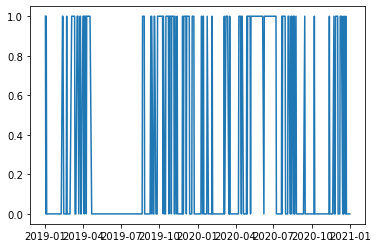

In [15]:
plt.plot(history.index, history.outliers)

Logistic Regression

In [30]:
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split

In [31]:
y = history.outliers
X_train, X_test, y_train, y_test = train_test_split(history, y, test_size=0.2)

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
model = LogisticRegression(solver='liblinear', random_state=0).fit(X_train, y_train)

In [38]:
y_pred = model.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(model.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.60


In [41]:
x = history.Volume
y = history.outliers